# REDES NEURONALES PRACTICA 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'keras'

## Importación de datos

In [14]:
data = pd.read_csv("../mobiles.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Modificamos los datos de DataFrame a una matriz de numpy

In [ ]:
features = data.iloc[:,:20].values
labels = data.iloc[:,20:21].values

In [ ]:
features

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

## Preprocesado

Deben estar en formato numérico

Recomendable dentro del rango [0 1] (StandarScale)

Binarizar las clases (OneHotEncoder)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
labels = ohe.fit_transform(labels).toarray()

In [ ]:
len(set(data["price_range"]))

4

In [ ]:
# División train y test, dejamos un 20 % para test

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.2)

## Diseño del modelo

Diseño del modelo con 4 capas ocultas, 20, 45, 10, 20 neuronas. Función de activación 'relu' y función de activación en la capa de salida 'softmax'

In [ ]:
model = Sequential()
model.add(Dense(20,  activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='softmax'))

Compilamos el modelo con una función de pérdida de validación cruzada binaria y una función de optimización Adam, con una velocidad de aprendizaje de 0.2 y una métrica Accuracy

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=adam(lr=0.2), metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Entrenamos el modelo con 10 épocas. Visualizamos la precisión (accuracy) y la pérdida (loss) del conjunto train y test

Loss: muestra como está funcionando el modelo para los conjuntos de entrenamiento y test mostrando la suma de los errores cometidos para cada ejemplo.

In [ ]:
history = model.fit(train_x, train_y, epochs=10, validation_data = (test_x, test_y))

Instructions for updating:
Use tf.cast instead.
Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 0s 239us/step - loss: 0.6102 - accuracy: 0.7445 - val_loss: 0.5652 - val_accuracy: 0.7500
Epoch 2/10
1600/1600 [==============================] - 0s 51us/step - loss: 0.5664 - accuracy: 0.7500 - val_loss: 0.5730 - val_accuracy: 0.7500
Epoch 3/10
1600/1600 [==============================] - 0s 50us/step - loss: 0.5683 - accuracy: 0.7500 - val_loss: 0.5662 - val_accuracy: 0.7500
Epoch 4/10
1600/1600 [==============================] - 0s 47us/step - loss: 0.5686 - accuracy: 0.7500 - val_loss: 0.5612 - val_accuracy: 0.7500
Epoch 5/10
1600/1600 [==============================] - 0s 51us/step - loss: 0.5650 - accuracy: 0.7500 - val_loss: 0.5733 - val_accuracy: 0.7500
Epoch 6/10
1600/1600 [==============================] - 0s 52us/step - loss: 0.5656 - accuracy: 0.7500 - val_loss: 0.5713 - val_accuracy: 0.7500
Epoch 7/10
1600/1600 [============

In [ ]:
import matplotlib.pyplot as plt
def acc_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train_val', 'Test_val'], loc='upper left')
    plt.show()
    
def loss_plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss']) 
    plt.title('Model loss') 
    plt.ylabel('Loss') 
    plt.xlabel('Epoch') 
    plt.legend(['Train_loss', 'Test_loss'], loc='upper left') 
    plt.show()

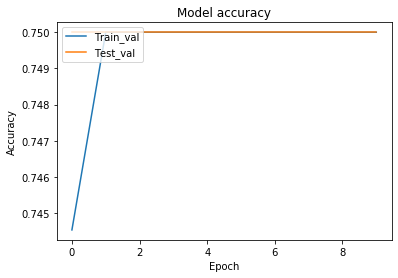

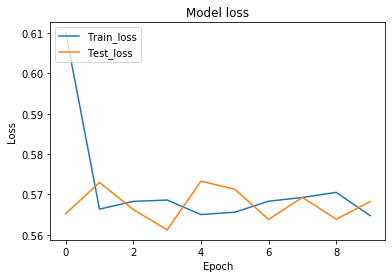

In [ ]:
acc_plot(history)
loss_plot(history)

Este modelo no esta correctamente diseñado, hay un exceso de neuronas en las capas intermediaS, la función de pérdida tiene cuatro clases por lo que no puede ser binary crossentropy, el número de épocas es reducido...

Construye nuevos modelos adaptados, tres modelos con una función de pérdida 'categorical_crossentropy'm un optimizador adam con un ratio de aprendizaje lr=0.001 y una métrica accuracy. Modelo 1: [20, 16, 12, 4], Modelo 2: [20, 3, 5, 4], Modelo 3: [20, 512, 250, 4] Visualizalos como en el ejercicio anterior 

In [ ]:
#Modelo 1
model1 = Sequential()


In [ ]:
#Model 2
model2 = Sequential()


In [ ]:
#Model 3
model3 = Sequential()


Visualizamos en el mismo gráfico la pérdida (loss) de train y test con los tres modelos de forma simultanea

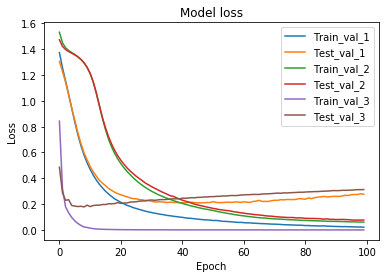

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_val_1', 'Test_val_1','Train_val_2', 'Test_val_2','Train_val_3', 'Test_val_3'], loc='upper right')
plt.show()

## Regularización 

Utilizaremos regularización para procurar evitar el sobre ajuste del modelo utilizando después de cada capa un Dropout del 40 % de probabilidad de mantener la neurona tras cada capa oculta. 'model4.add(Dropout(0.6))' Utiliza de los modelos anteriores aquel que mayor overfitting presenta


In [ ]:
model4 = Sequential()


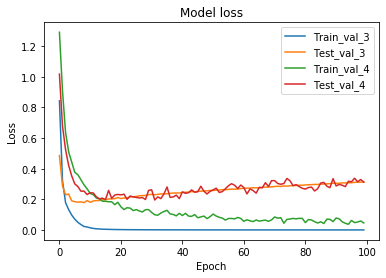

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_val_3', 'Test_val_3','Train_val_4', 'Test_val_4'], loc='upper right')
plt.show()